import nessecary libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

read file using pandas
naming the coloums

In [17]:
col=['fLength',' fWidth','fConc','fM3Trans','fDist','fConc1 ','fSize','fAsym','fM3Long','fAlpha',' class']
df=pd.read_csv('magic04.data', names=col)

use head function to show first five rows


In [18]:
df.head()

,fLength,fWidth,fConc,fM3Trans,fDist,fConc1,fSize,fAsym,fM3Long,fAlpha,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [19]:
   # df['class'] = (df['class'] == 'g').astype(int)
   # df.head()
   df.columns = df.columns.str.strip()
   df.head()


,fLength,fWidth,fConc,fM3Trans,fDist,fConc1,fSize,fAsym,fM3Long,fAlpha,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [20]:
df["class"]=(df["class"]=='g').astype(int)
df.head()

,fLength,fWidth,fConc,fM3Trans,fDist,fConc1,fSize,fAsym,fM3Long,fAlpha,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [6]:
print(df.columns)

Index(['fLength', 'fWidth', 'fConc', 'fM3Trans', 'fDist', 'fConc1', 'fSize',
       'fAsym', 'fM3Long', 'fAlpha', 'class'],
      dtype='object')


remove leading or trailing whitespace


In [7]:
df.columns= df.columns.str.strip()

made histrogram of the data gamma in blue and hadron in red

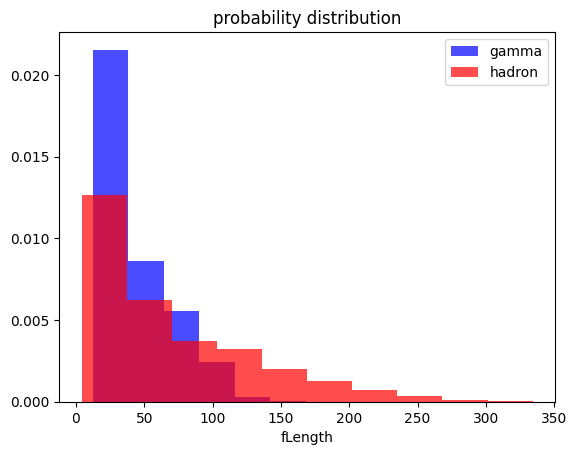

Missing ' fWidth' column


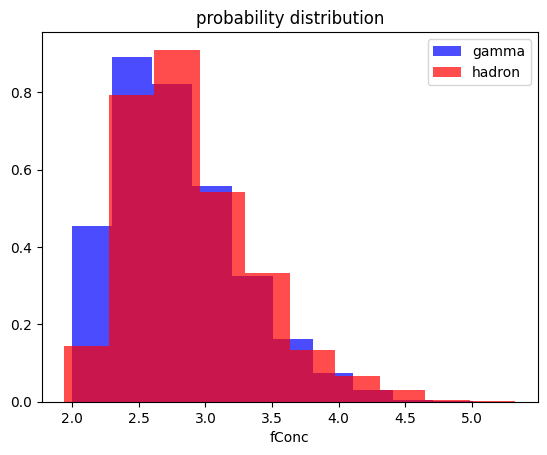

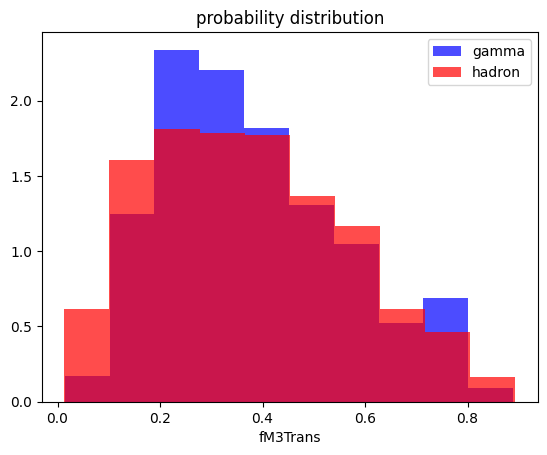

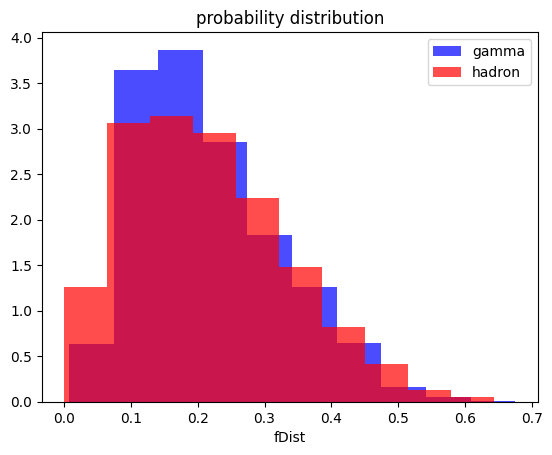

Missing 'fConc1 ' column


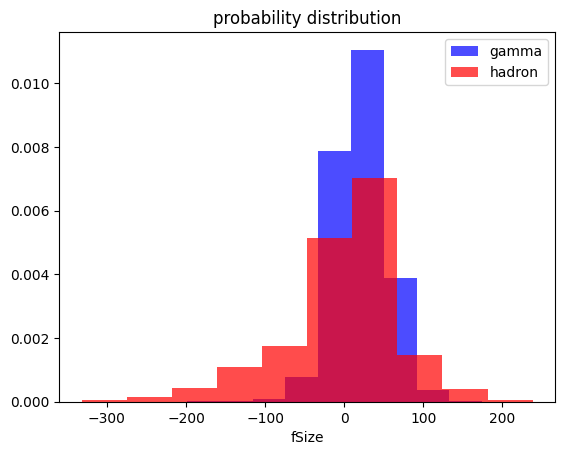

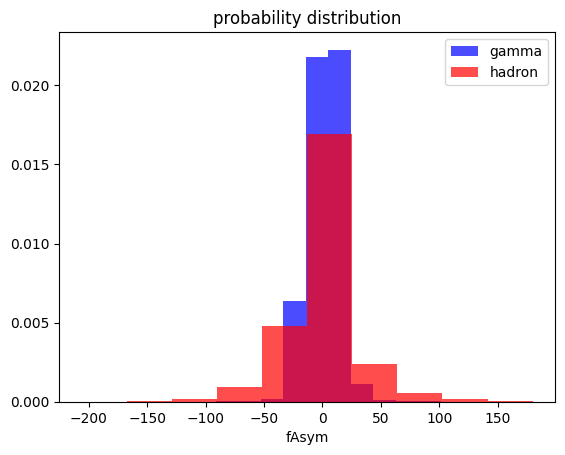

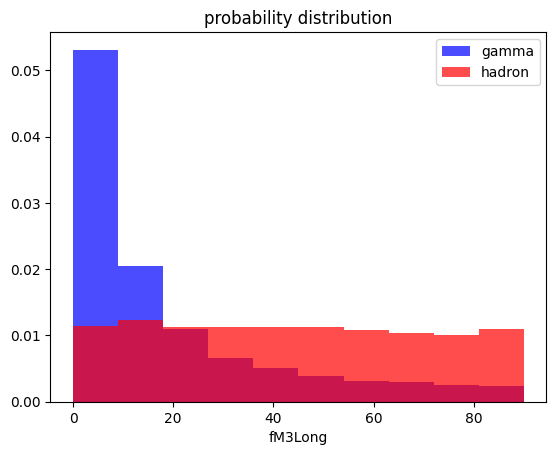

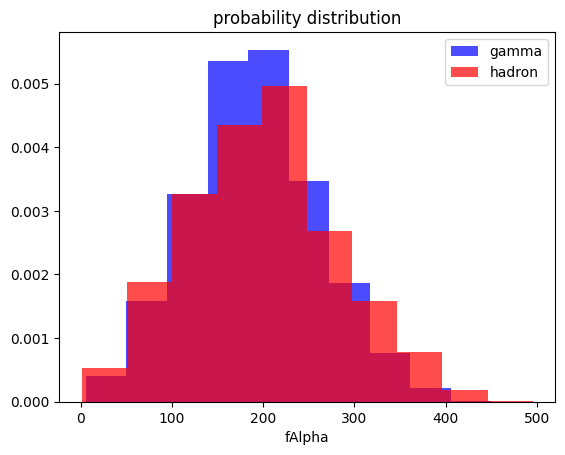

In [8]:
for label in col[:-1]:
 if label in df.columns:
    plt.hist(df[df["class"]==1] [label], color = 'blue', label = 'gamma', alpha = 0.7, density = True )
    plt.hist(df[df["class"]==0] [label], color = 'red', label = "hadron", alpha = 0.7, density = True)
    plt.title("probability distribution")
    plt.xlabel(label)
    plt.legend()
    plt.show()
 else:
        print(f"Missing '{label}' column")

Train, valid, test datasets
 Split the DataFrame `df` into three subsets: train, valid, and test.
Shuffle the DataFrame to ensure randomness.
Create a training set with 60% of the data.
Create a validation set with the next 20% of the data.
Create a test set with the remaining 20% of the data.


In [21]:
# train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int (0.8*len(df))])
# the code from tutorial was giving error so I used the code below
shuffled_df = df.sample(frac=1, random_state=42)
train, valid, test = np.split(shuffled_df, [int(0.6*len(shuffled_df)), int(0.8*len(shuffled_df))])


c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [22]:
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler


## Purpose
The `scale_data` function preprocesses a given DataFrame by:
1. Separating features and the target variable.
2. Scaling the features using `StandardScaler`.
3. Returning the scaled features and the target variable.
4. use `RandomOverSampler` to scale the dataset.

In [23]:
def scale_dataset(dataframe, oversample=False):
    # Checked if the input is a DataFrame
    if isinstance(dataframe, pd.DataFrame):
        X = dataframe.iloc[:, :-1].values  # Features [iloc]->allows to access specific row and column [row, col]
        y = dataframe.iloc[:, -1].values    # Target
        
        scaler = StandardScaler()  # Created a scaler object
        X = scaler.fit_transform(X)  # Fit and transform the features

        if oversample:
            ran = RandomOverSampler()  # Create oversampler object
            X, y = ran.fit_resample(X, y)  # Balance the dataset

        # Return as DataFrames
        return pd.DataFrame(X), pd.Series(y)  # Returning features as DataFrame and target as Series

    else:
        raise ValueError("Input must be a pandas DataFrame.")

# Scaling the datasets
X_train, y_train = scale_dataset(train, oversample=True)
X_valid, y_valid = scale_dataset(valid, oversample=False)
X_test, y_test = scale_dataset(test, oversample=False)



In [12]:
# len(y_train)
# sum(y_train ==1 )
# sum(y_train ==0)

# K-Nearest Neighbors Classifier Overview

. **Train the Model**:
   - Fits the model to training data (`X_train` and `y_train`), allowing it to learn patterns.

. **Make Predictions**:
   - Uses the trained model to predict class labels for the test data (`X_test`).

. **Evaluate Predictions**:
   - Compares predicted labels (`y_pred`) with actual labels (`y_test`) to assess performance.

. **Generate Classification Report**:
   - Produces a detailed report showing 
   precision-> Accuracy of positive predictin
   Recall-> Ability to find all the relevant instances
   F1-score-> Balance between precision and recall
   support-> Number of actual occurances for each classs.




In [13]:
from sklearn.neighbors import KNeighborsClassifier


In [14]:
knn_model = KNeighborsClassifier(n_neighbors= 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn_model.predict(X_test)

In [16]:
# y_pred
y_test

0       1
1       0
2       0
3       1
4       1
       ..
3799    1
3800    1
3801    1
3802    1
3803    0
Length: 3804, dtype: int64

In [40]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1331
           1       0.86      0.86      0.86      2473

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



# Navive Bayes
Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:

`P(A∣B) = P(B∣A)P(A)/P(B)`
where A and B are events and P(B) ≠ 0

Basically, we are trying to find probability of event A, given the event B is true. Event B is also termed as evidence.
- P(A) is the priori of A (the prior probability, i.e. Probability of event before evidence is seen).
- The evidence is an attribute value of an unknown instance(here, it is event B).
- P(B) is Marginal Probability: Probability of Evidence.
- P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.
- P(B|A) is Likelihood probability i.e the likelihood that a hypothesis will come true based on the evidence.

​


In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [21]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.39      0.49      1331
           1       0.73      0.89      0.80      2473

    accuracy                           0.72      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.71      0.72      0.69      3804



# log Regression
Logistic regression is used for binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1. For example, we have two classes Class 0 and Class 1 if the value of the logistic function for an input is greater than 0.5 (threshold value) then it belongs to Class 1 otherwise it belongs to Class 0.

- Independent observations: Each observation is independent of the other. meaning there is no correlation between any input variables.
- Binary dependent variables: It takes the assumption that the dependent variable must be binary or dichotomous, meaning it can take only two values. For more than two - categories SoftMax functions are used.
- Linearity relationship between independent variables and log odds: The relationship between the independent variables and the log odds of the dependent variable should be linear.
- No outliers: There should be no outliers in the dataset.
- Large sample size: The sample size is sufficiently large

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [24]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1331
           1       0.84      0.81      0.82      2473

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# SVM
 Support Vector Machines (SVM) are powerful algorithms in machine learning, ideal for both classification and regression tasks. SVM’s adaptability through kernel functions allows it to handle both linear and nonlinear data effectively.

In [25]:
from sklearn.svm import SVC

In [26]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [27]:
y_pred= svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1331
           1       0.89      0.89      0.89      2473

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



# Nueral Net

In [1]:
import tensorflow as tf

In [35]:
def plot_history(history):
    fig, ax1 = plt.subplots()
    
    # Plot loss and validation loss
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')  # Corrected line
    ax1.grid(True)
    
    # Plot accuracy and validation accuracy
    ax2 = ax1.twinx()  # Create a second y-axis
    ax2.plot(history.history['accuracy'], label='accuracy', color='green')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy', color='orange')
    ax2.set_ylabel('Accuracy')
    
    # Add legend and show plot
    fig.legend(loc="upper right")
    plt.show()


funtion for trainning data

In [28]:
def train_model(X_train,y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
 nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
 ])
 nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',metrics=['accuracy'])
 history = nn_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_valid, y_valid))
 return nn_model, history

Training with num_nodes = 32, dropout_prob = 0.2, lr = 0.001, batch_size = 32


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.6857 - loss: 0.5721 - val_accuracy: 0.8186 - val_loss: 0.4058
Epoch 2/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7960 - loss: 0.4395 - val_accuracy: 0.8386 - val_loss: 0.3899
Epoch 3/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8099 - loss: 0.4176 - val_accuracy: 0.8507 - val_loss: 0.3726
Epoch 4/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8151 - loss: 0.4034 - val_accuracy: 0.8488 - val_loss: 0.3689
Epoch 5/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8208 - loss: 0.3911 - val_accuracy: 0.8557 - val_loss: 0.3478
Epoch 6/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8336 - loss: 0.3742 - val_accuracy: 0.8570 - val_loss: 0.3429
Epoch 7/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8345 - loss: 0.3763 - val_accuracy: 0.8615 - val_loss: 0.3378
Epoch 8/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8400 - loss: 0.3683 - val_accuracy

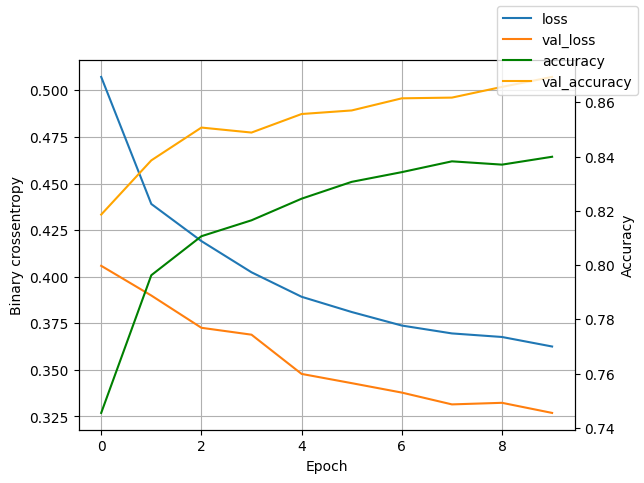

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8698 - loss: 0.3201


In [38]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 10
for num_nodes in [32]:
    for dropout_prob in [0.2]:
        for lr in [0.001]:
            for batch_size in [32]:
                print(f"Training with num_nodes = {num_nodes}, dropout_prob = {dropout_prob}, lr = {lr}, batch_size = {batch_size}")
                model, history = train_model(X_train, y_train,num_nodes,dropout_prob, lr,batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [41]:
y_pred= least_loss_model.predict(X_test)
y_pred=(y_pred > 0.5).reshape(-1,)
print(classification_report(y_test, y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1331
           1       0.88      0.91      0.90      2473

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804

